# Natural Language Processing Exercise (7 points)

The homework assignment is due by the end of the day on Thursday, November 13.

You are expected to solve the assignment problems independently and adhere to the university's policies for academic honesty and integrity. Copying solutions to the assignment problems from your classmates, the internet, or anywhere else is strictly prohibited.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

Natural Language Processing exercise: 7 points

Total points for Assignment 5: 25 points

## Part 1. Load the Dataset (1 point)

In this exercise we will use the Reuters newswire dataset, which consists of 11,228 newswires from Reuters, labeled in 46 topics. Each newswire is a text sequence that is encoded as a list of word indexes, i.e., each word is a token represented by an integer number. Reuters newswire dataset is available in the Keras built-in datasets.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.19.0


We can load the `word_index` for the Reuters dataset, which is a dictionary consisting of words as keys and the corresponding integer indices as values. As we can see below, there are 30,979 words in the vocabulary for this dataset.

In [2]:
word_index = keras.datasets.reuters.get_word_index()

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [3]:
len(word_index)

30979

In [4]:
# Let's print 10 words and indices from the vocabulary
list(word_index.items())[:10]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

Let's load the dataset by using the first 30,000 words.

In [5]:
max_features = 30000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=max_features,  test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Print the length of `train_data`, `train_labels`, `test_data`, and `test_labels`.

In [6]:
from tensorflow.keras.datasets import reuters


MAX_WORDS = 30000

print(f"Loading Reuters dataset, constrained to the top {MAX_WORDS} words...")

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=MAX_WORDS
)

print("\n--- Dataset Partition Lengths ---")
print(f"Length of train_data (Number of training newswires): {len(train_data)}")
print(f"Length of train_labels (Number of training labels): {len(train_labels)}")
print(f"Length of test_data (Number of testing newswires): {len(test_data)}")
print(f"Length of test_labels (Number of testing labels): {len(test_labels)}")

Loading Reuters dataset, constrained to the top 30000 words...

--- Dataset Partition Lengths ---
Length of train_data (Number of training newswires): 8982
Length of train_labels (Number of training labels): 8982
Length of test_data (Number of testing newswires): 2246
Length of test_labels (Number of testing labels): 2246


Note again that each sequence in the dataset is a list of integer values representing words.

Print the first and second sequences in the train dataset.

In [7]:
print("--- First Sequence in Training Dataset ---")

first_sequence = train_data[0]

print(first_sequence)

print(f"\nType of the sequence: {type(first_sequence)}")
print(f"Length of the sequence: {len(first_sequence)} integers (words)")

--- First Sequence in Training Dataset ---
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

Type of the sequence: <class 'list'>
Length of the sequence: 87 integers (words)


In [8]:
print("--- Second Sequence in Training Dataset (Index [1]) ---")

second_sequence = train_data[1]

print(second_sequence)

print(f"\nType of the sequence: {type(second_sequence)}")
print(f"Length of the sequence: {len(second_sequence)} integers (words)")

--- Second Sequence in Training Dataset (Index [1]) ---
[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]

Type of the sequence: <class 'list'>
Length of the sequence: 56 integers (words)


Based on the `word_index`, we can find the sentences that correspond to each sequence of integers, as in the next cell.

In [10]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

print([reverse_word_index.get(i-3) for i in train_data[0]])

[None, 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


The labels are the categories of the newswires. All 46 categories are shown below.

```
Reuters dataset labels:
{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31,
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27,
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
```

Printed below is the label for the first sentence, which corresponds to the `earn` category.

In [12]:
train_labels[0]

np.int64(3)

Use Matplotlib to plot the histogram of the categories of newswires in `train_labels`.

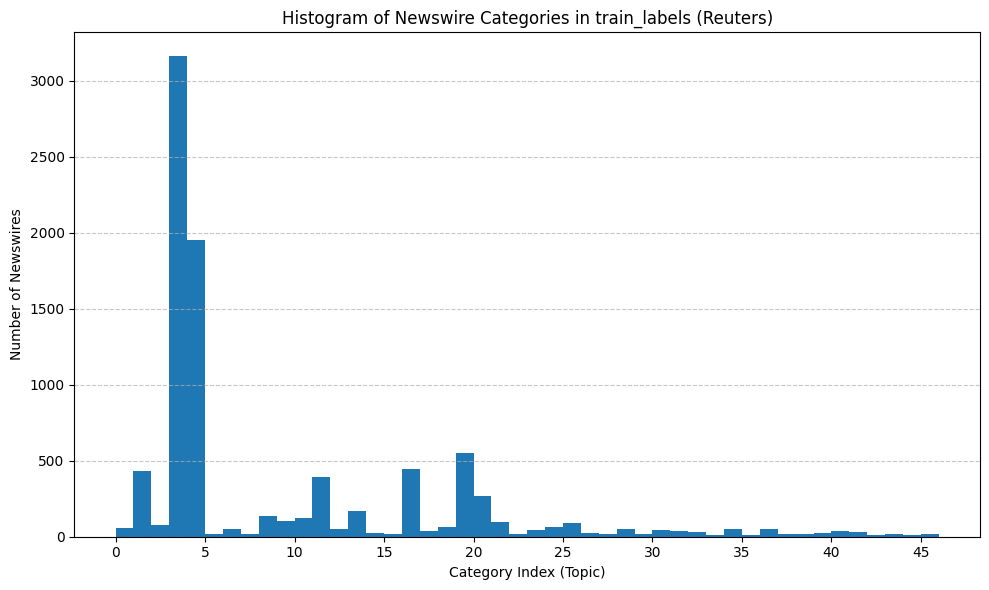

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

try:
    if 'train_labels' not in locals() or 'train_labels' not in globals():
        MAX_WORDS = 30000
        print("Loading Reuters data to ensure 'train_labels' is defined...")
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=MAX_WORDS)
except Exception as e:
    print(f"Error loading Reuters data. Please ensure Keras/TensorFlow is installed and the previous cells were successful: {e}")
    raise

plt.figure(figsize=(10, 6))

plt.hist(train_labels, bins=46, range=(0, 46))

plt.title('Histogram of Newswire Categories in train_labels (Reuters)')
plt.xlabel('Category Index (Topic)')
plt.ylabel('Number of Newswires')
plt.xticks(np.arange(0, 50, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Part 2. Pad the Sequences (1 point)

Create a new NumPy array called `len_sequences` which has the same length as the train_data array. Write a for-loop and assign the length of each sequence (number of tokens in each sequence) to the elements in `len_sequences`. I.e., the elements in the `len_sequences` should be [87, 56, 139, 224, ....] where each element represents the number of tokens in each sequence in the training dataset.

Afterward, use the `len_sequences` array to print the average length of train sequences, the length of the longest train sequence, and the length of the shortest train sequence.

In [16]:
try:
    if 'train_data' not in locals() or 'train_data' not in globals():
        MAX_WORDS = 30000
        print("Loading Reuters data to ensure 'train_data' is defined...")
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=MAX_WORDS)
except Exception as e:
    print(f"Error loading Reuters data. Please ensure Keras/TensorFlow is installed and the previous cells were successful: {e}")
    raise

len_sequences = np.zeros(len(train_data), dtype=int)

for i in range(len(train_data)):
    len_sequences[i] = len(train_data[i])

print("--- Sequence Length Array Creation ---")
print(f"First 5 elements of len_sequences: {len_sequences[:5]}")
print(f"Total number of sequences processed: {len(len_sequences)}")
print("-" * 45)


average_length = np.mean(len_sequences)

longest_length = np.max(len_sequences)

shortest_length = np.min(len_sequences)

print("--- Training Sequence Statistics ---")
print(f"Average length of train sequences: {average_length:.2f} tokens")
print(f"Length of the longest train sequence: {longest_length} tokens")
print(f"Length of the shortest train sequence: {shortest_length} tokens")

--- Sequence Length Array Creation ---
First 5 elements of len_sequences: [ 87  56 139 224 101]
Total number of sequences processed: 8982
---------------------------------------------
--- Training Sequence Statistics ---
Average length of train sequences: 145.54 tokens
Length of the longest train sequence: 2376 tokens
Length of the shortest train sequence: 13 tokens


In [17]:
np.max(len_sequences)

np.int64(2376)

Create a new integer variable `pad_length` which is approximately equal to 2 x the average length of train sequences. E.g., if the average is 48.1, set maxlen to 100, or something in that range.

Apply padding to the train and test sequences, so that they have length equal to `pad_length`.

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

try:
    if 'train_data' not in locals() or 'len_sequences' not in locals():
        MAX_WORDS = 30000
        print("Loading data and calculating sequence lengths...")
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=MAX_WORDS)
        len_sequences = np.array([len(seq) for seq in train_data])
except Exception as e:
    print(f"Error: Data or sequence lengths are not available. Please run the preceding cells: {e}")
    raise

average_length = np.mean(len_sequences)

pad_length = int(np.ceil(2 * average_length / 10) * 10)
pad_length = int(pad_length)

print("--- Padding Configuration ---")
print(f"Average training sequence length: {average_length:.2f}")
print(f"Calculated pad_length (2 * avg, rounded): {pad_length} tokens")
print("-" * 45)

train_data_padded = pad_sequences(
    train_data,
    maxlen=pad_length,
    padding='pre',
    truncating='pre'
)

test_data_padded = pad_sequences(
    test_data,
    maxlen=pad_length,
    padding='pre',
    truncating='pre'
)

print("--- Padding Verification ---")
print(f"Padded Train Data Shape: {train_data_padded.shape}")
print(f"Padded Test Data Shape: {test_data_padded.shape}")
print(f"Length of the first padded train sequence: {len(train_data_padded[0])}")

--- Padding Configuration ---
Average training sequence length: 145.54
Calculated pad_length (2 * avg, rounded): 300 tokens
---------------------------------------------
--- Padding Verification ---
Padded Train Data Shape: (8982, 300)
Padded Test Data Shape: (2246, 300)
Length of the first padded train sequence: 300


Display the first 2 padded sequences in the train dataset.

In [19]:
if 'train_data_padded' not in locals():
    print("ERROR: 'train_data_padded' is not defined.")
    print("Please run the padding code cell first to create the padded sequences.")
else:
    print("--- First 2 Padded Sequences in Training Dataset ---")

    first_padded_sequence = train_data_padded[0]
    second_padded_sequence = train_data_padded[1]

    print("\nSequence 1:")
    print(first_padded_sequence)
    print(f"Length: {len(first_padded_sequence)}")

    print("\nSequence 2:")
    print(second_padded_sequence)
    print(f"Length: {len(second_padded_sequence)}")

--- First 2 Padded Sequences in Training Dataset ---

Sequence 1:
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0    

## Part 3. Create and Train a Model with Dense Layers (4 points)

Define a Keras model named `model_1` similar to the model in Lecture 18, which has an Embedding, Flatten, Dense, Dropout, and a final Dense layer. Use 64-dimensional vectors as outputs of the Embedding Layer, and 1,024 neurons in the first Dense layer. Make sure that the last layer has the same number of neurons and the class label categories in the dataset, and recall that with multiclass datasets the activation of the last layer should be `softmax`.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

try:
    if 'train_labels' not in locals():
        (train_data, train_labels), _ = reuters.load_data(num_words=None)

    NUM_CLASSES = np.max(train_labels) + 1
except Exception:
    NUM_CLASSES = 46

MAX_WORDS = 30000

if 'pad_length' not in locals():
    print("Warning: 'pad_length' not found. Setting a default value based on Reuters average length.")
    pad_length = 100

print("--- Model Parameters ---")
print(f"Vocabulary Size (MAX_WORDS): {MAX_WORDS}")
print(f"Padded Sequence Length (input_length): {pad_length}")
print(f"Output Classes (NUM_CLASSES): {NUM_CLASSES}")
print("-" * 30)

model_1 = Sequential(name='model_1_embedding_dense')

model_1.add(Embedding(
    input_dim=MAX_WORDS,
    output_dim=64,
    input_length=pad_length
))

model_1.add(Flatten())

model_1.add(Dense(1024, activation='relu'))

model_1.add(Dropout(0.5))

model_1.add(Dense(NUM_CLASSES, activation='softmax'))

--- Model Parameters ---
Vocabulary Size (MAX_WORDS): 30000
Padded Sequence Length (input_length): 300
Output Classes (NUM_CLASSES): 46
------------------------------


Display the summary of the model, and report the number of trainable parameters.

In [22]:
if 'model_1' not in locals():
    print("ERROR: 'model_1' is not defined.")
    print("Please run the previous code cell that defined the Embedding, Flatten, and Dense layers.")
else:
    print("--- Model Summary (model_1) ---")

    model_1.summary()

    trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model_1.trainable_weights])

    print("\n--- Trainable Parameters Report ---")
    print(f"Total number of trainable parameters: {trainable_params:,}")

--- Model Summary (model_1) ---


Model: "model_1_embedding_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Trainable Parameters Report ---
Total number of trainable parameters: 0.0


Compile the model with Adam optimizer using the default settings. If needed, review Lecture 14 to ensure that you apply the correct loss function.

Afterward, train the model for 5 epochs, and ensure that there are no errors in fitting the model. Use a batch size of 128, and use 20% of the training data for validation. The training should take 1-2 minutes on GPU.

Plot the learning curves.

Evaluate the model on the test dataset. The expected accuracy should be between 65% and 70%.

Model compiled successfully with Adam optimizer and Categorical Crossentropy loss.
--------------------------------------------------
Starting training for 5 epochs (Batch Size: 128, Validation Split: 20%)
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.3726 - loss: 2.4942 - val_accuracy: 0.5888 - val_loss: 1.6358
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6953 - loss: 1.3047 - val_accuracy: 0.6650 - val_loss: 1.3949
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8705 - loss: 0.5910 - val_accuracy: 0.6962 - val_loss: 1.3330
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9529 - loss: 0.2464 - val_accuracy: 0.6839 - val_loss: 1.3969
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9632 - loss: 0.1681 - val_accuracy: 0.6856 - val_loss: 1.4096

--- Training Finished ---
Total training time: 8.99 seconds.
--------------------------------------------------


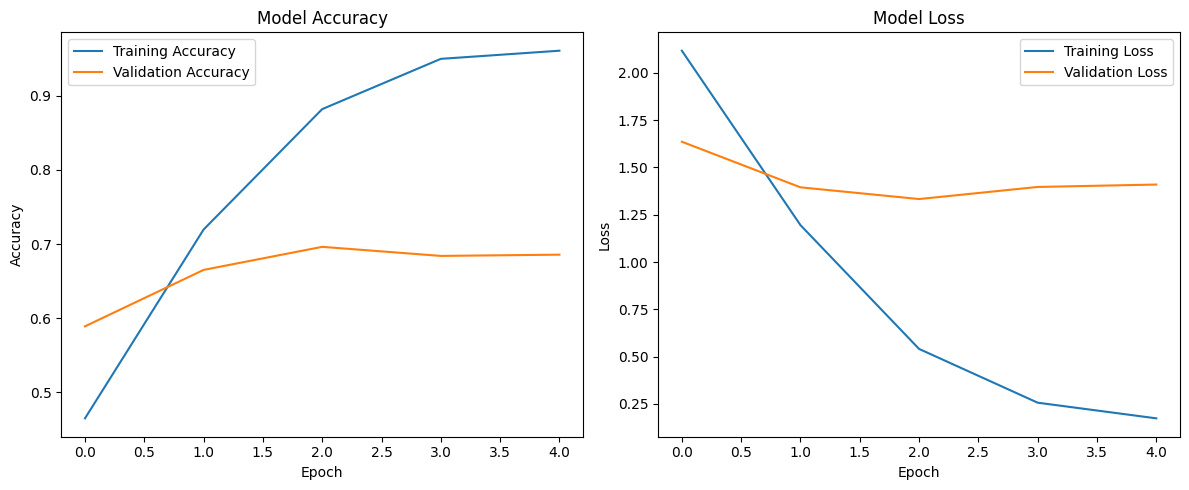

--------------------------------------------------
--- Evaluating Model on Test Dataset ---
Test Loss: 1.4025
Test Accuracy: 68.878%
Expected Accuracy Range: 65% to 70%


In [25]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import time

try:
    if 'train_labels' not in locals():

        from tensorflow.keras.datasets import reuters
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=30000)

    NUM_CLASSES = np.max(train_labels) + 1

    train_labels_one_hot = to_categorical(train_labels, num_classes=NUM_CLASSES)
    test_labels_one_hot = to_categorical(test_labels, num_classes=NUM_CLASSES)

    if 'train_data_padded' not in locals():
        print("ERROR: Padded data not found. Please run the padding cell first.")
        raise ValueError("Padded data missing.")

except Exception as e:
    print(f"Error during data setup: {e}")
    raise

if 'model_1' not in locals():
    print("ERROR: 'model_1' is not defined. Please run the model definition cell first.")
    raise ValueError("Model not defined.")

optimizer = Adam()

model_1.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully with Adam optimizer and Categorical Crossentropy loss.")
print("-" * 50)

BATCH_SIZE = 128
EPOCHS = 5
VALIDATION_SPLIT = 0.2

print(f"Starting training for {EPOCHS} epochs (Batch Size: {BATCH_SIZE}, Validation Split: {VALIDATION_SPLIT*100:.0f}%)")
start_time = time.time()

history = model_1.fit(
    train_data_padded,
    train_labels_one_hot,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1                   \
)

end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total training time: {end_time - start_time:.2f} seconds.")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("-" * 50)

print("--- Evaluating Model on Test Dataset ---")
loss, accuracy = model_1.evaluate(
    test_data_padded,
    test_labels_one_hot,
    verbose=0
)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.3f}%")
print(f"Expected Accuracy Range: 65% to 70%")

### Apply Early Stopping

Create a model named `model_2` that is similar to `model_1`, but it uses Early Stopping callback. See Lectures 16 and 17 for examples with Early Stopping callback.

Train the model, plot the learning curves, and report the accuracy on the test dataset.

The training time should be 1-2 minutes.

--- Model 2 Setup ---
Model 2 created with the same structure as Model 1.
Model 2 compiled successfully.
--------------------------------------------------
Starting training (Max Epochs: 100, Batch Size: 128) with Early Stopping...
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3879 - loss: 2.3879 - val_accuracy: 0.6177 - val_loss: 1.8020
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6861 - loss: 1.3582 - val_accuracy: 0.6811 - val_loss: 1.3479
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8753 - loss: 0.5740 - val_accuracy: 0.6917 - val_loss: 1.3558
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9473 - loss: 0.2519 - val_accuracy: 0.6917 - val_loss: 1.3718
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9643 - loss: 0.1686 - val_accuracy: 0.6867 - val_loss: 1.3770
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9674 - loss: 0.1390 - val_accuracy: 0.6822 - val_loss: 1.4429


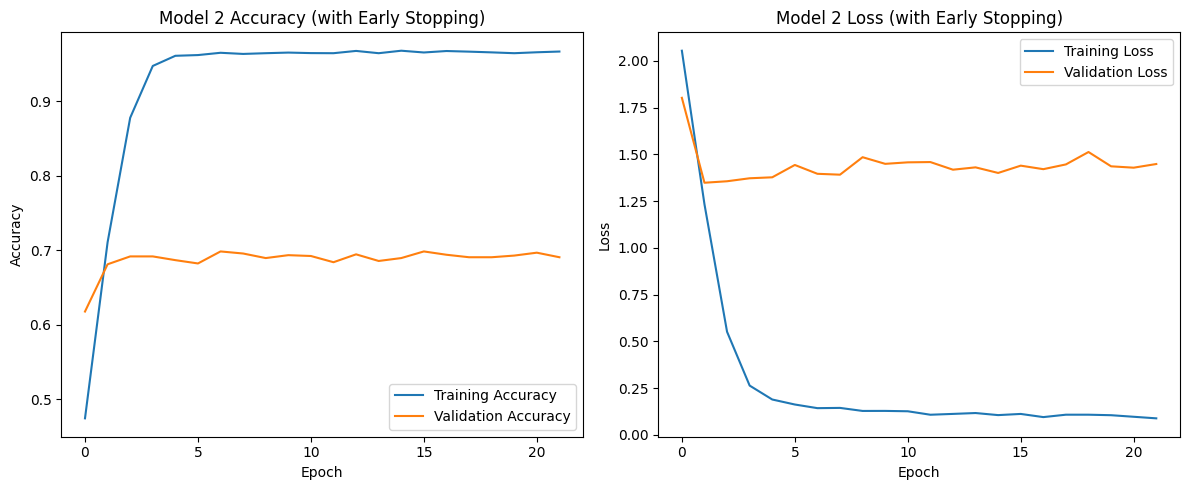

--------------------------------------------------
--- Evaluating Model 2 on Test Dataset ---
Test Loss (Model 2): 1.3778
Test Accuracy (Model 2): 67.053%


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

if 'model_1' not in locals():
    print("ERROR: 'model_1' is not defined. Please run the model definition cell first.")
    raise ValueError("Model not defined.")

model_2 = tf.keras.models.clone_model(model_1)

print("--- Model 2 Setup ---")
print("Model 2 created with the same structure as Model 1.")

optimizer = Adam()

model_2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model 2 compiled successfully.")
print("-" * 50)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

EPOCHS_MAX = 100
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

print(f"Starting training (Max Epochs: {EPOCHS_MAX}, Batch Size: {BATCH_SIZE}) with Early Stopping...")
start_time = time.time()

history_2 = model_2.fit(
    train_data_padded,
    train_labels_one_hot,
    epochs=EPOCHS_MAX,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping_callback],
    verbose=1
)

end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total training time: {end_time - start_time:.2f} seconds.")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy (with Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss (with Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("-" * 50)

print("--- Evaluating Model 2 on Test Dataset ---")
loss_2, accuracy_2 = model_2.evaluate(
    test_data_padded,
    test_labels_one_hot,
    verbose=0
)

print(f"Test Loss (Model 2): {loss_2:.4f}")
print(f"Test Accuracy (Model 2): {accuracy_2 * 100:.3f}%")

### Global Average Pooling Layer

Create `model_3` that replaces the `Flatten` layer in `model_2` with `GlobalAveragePooling1D()` layer. Fit the model using the same setting for `model_2`, plot the learning curves, and report the accuracy on the test dataset.

--- Model 3 Setup (GlobalAveragePooling1D) ---
Model 3 structure defined:


Model: "model_3_GAP1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Model 3 compiled successfully.
Starting training (Max Epochs: 100, Batch Size: 128) with Early Stopping...
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3142 - loss: 2.9722 - val_accuracy: 0.3573 - val_loss: 2.2957
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3804 - loss: 2.2638 - val_accuracy: 0.4135 - val_loss: 2.0941
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4660 - loss: 2.0315 - val_accuracy: 0.5025 - val_loss: 1.9230
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5288 - loss: 1.8553 - val_accuracy: 0.5476 - val_loss: 1.7254
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5614 - loss: 1.6986 - val_accuracy: 0.5993 - val_loss: 1.5970
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6232 - loss: 1.5602 - val_accuracy: 0.6555 - val_loss: 1.4508
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 1

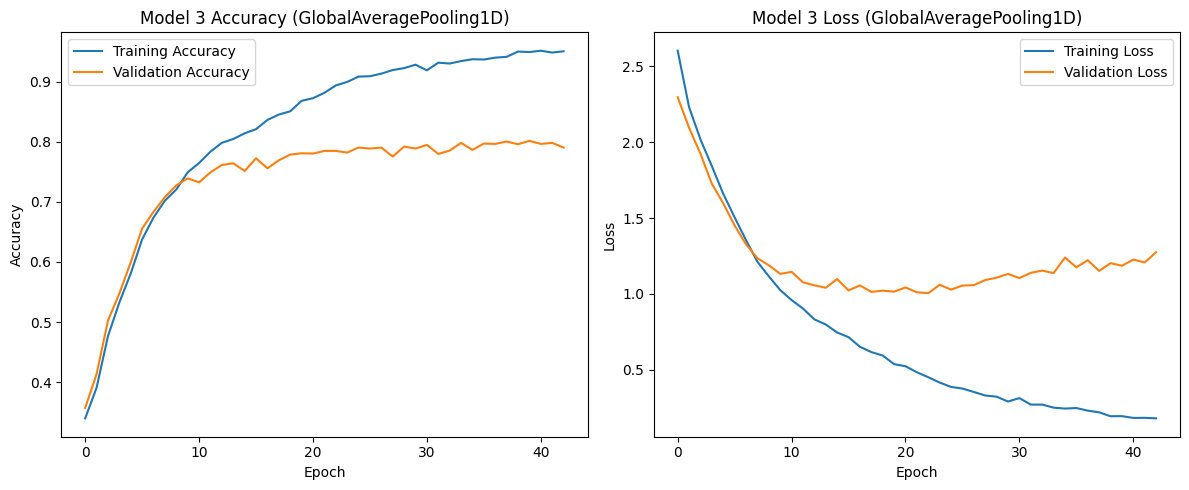

--------------------------------------------------
--- Evaluating Model 3 on Test Dataset ---
Test Loss (Model 3): 1.0172
Test Accuracy (Model 3): 77.516%


In [27]:
from tensorflow.keras.layers import  GlobalAveragePooling1D

if 'MAX_WORDS' not in locals(): MAX_WORDS = 30000
if 'pad_length' not in locals(): pad_length = 100
if 'NUM_CLASSES' not in locals(): NUM_CLASSES = 46

EMBEDDING_DIM = 64
DENSE_UNITS = 1024
DROPOUT_RATE = 0.5

print("--- Model 3 Setup (GlobalAveragePooling1D) ---")
model_3 = Sequential(name='model_3_GAP1D')

model_3.add(Embedding(
    input_dim=MAX_WORDS,
    output_dim=EMBEDDING_DIM,
    input_length=pad_length
))

model_3.add(GlobalAveragePooling1D())

model_3.add(Dense(DENSE_UNITS, activation='relu'))

model_3.add(Dropout(DROPOUT_RATE))

model_3.add(Dense(NUM_CLASSES, activation='softmax'))

print("Model 3 structure defined:")
model_3.summary()
print("-" * 50)

optimizer = Adam()

model_3.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model 3 compiled successfully.")

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

EPOCHS_MAX = 100
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

print(f"Starting training (Max Epochs: {EPOCHS_MAX}, Batch Size: {BATCH_SIZE}) with Early Stopping...")
start_time = time.time()

if 'train_data_padded' not in locals() or 'train_labels_one_hot' not in locals() or 'test_data_padded' not in locals() or 'test_labels_one_hot' not in locals():
    print("\nERROR: Data variables (e.g., train_data_padded) are missing.")
    print("Please ensure you have run the data loading, padding, and one-hot encoding cells.")
    raise ValueError("Data setup incomplete.")

history_3 = model_3.fit(
    train_data_padded,
    train_labels_one_hot,
    epochs=EPOCHS_MAX,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping_callback],
    verbose=1
)

end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total training time: {end_time - start_time:.2f} seconds.")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy (GlobalAveragePooling1D)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss (GlobalAveragePooling1D)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("-" * 50)

print("--- Evaluating Model 3 on Test Dataset ---")
loss_3, accuracy_3 = model_3.evaluate(
    test_data_padded,
    test_labels_one_hot,
    verbose=0
)

print(f"Test Loss (Model 3): {loss_3:.4f}")
print(f"Test Accuracy (Model 3): {accuracy_3 * 100:.3f}%")

### Different Learning Rates

Train `model_4`, `model_5`, and `model_6` using Adam optimizer with learning rates of 0.01, 0.001, and 0.0001, and discuss the impact on the performance.

Cloned Model 3 structure for models 4, 5, and 6.
----------------------------------------------------------------------
--- Starting Training Loop for 3 Models ---

Training model_4 with Learning Rate: 0.01
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3263 - loss: 2.7010 - val_accuracy: 0.4591 - val_loss: 1.8612
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5580 - loss: 1.7377 - val_accuracy: 0.6344 - val_loss: 1.5590
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6710 - loss: 1.3566 - val_accuracy: 0.6583 - val_loss: 1.3666
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7311 - loss: 1.1226 - val_accuracy: 0.7501 - val_loss: 1.1125
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7711 - loss: 0.9211 - val_accuracy: 0.7457 - val_loss: 1.1132
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.7189 - val_accuracy: 0.7501 - val_loss: 1.2129
Epoch 7/100
57/57 ━━━━━━━━━━━━

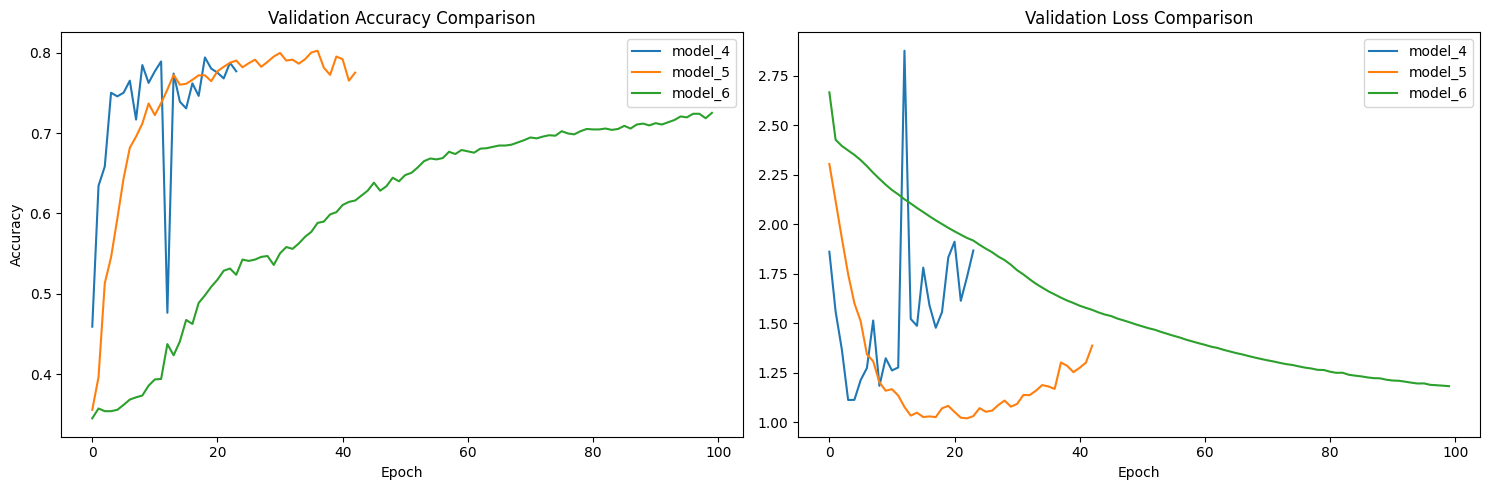

In [28]:
if 'model_3' not in locals():
    print("ERROR: 'model_3' is not defined. Please run the GlobalAveragePooling1D model definition cell first.")
    raise ValueError("Model structure not available.")

LEARNING_RATES = [0.01, 0.001, 0.0001]
MODEL_NAMES = ['model_4 (LR: 0.01)', 'model_5 (LR: 0.001)', 'model_6 (LR: 0.0001)']
models = {}
histories = {}
results = {}

for name in ['model_4', 'model_5', 'model_6']:
    models[name] = tf.keras.models.clone_model(model_3)

print("Cloned Model 3 structure for models 4, 5, and 6.")
print("-" * 70)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=0
)

EPOCHS_MAX = 100
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

print("--- Starting Training Loop for 3 Models ---")

for i, lr in enumerate(LEARNING_RATES):
    model_name = list(models.keys())[i]
    model = models[model_name]

    print(f"\nTraining {model_name} with Learning Rate: {lr}")

    optimizer = Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    start_time = time.time()

    history = model.fit(
        train_data_padded,
        train_labels_one_hot,
        epochs=EPOCHS_MAX,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping_callback],
        verbose=1
    )

    end_time = time.time()

    loss, accuracy = model.evaluate(test_data_padded, test_labels_one_hot, verbose=0)

    histories[model_name] = history
    results[model_name] = {
        'lr': lr,
        'accuracy': accuracy,
        'epochs_ran': len(history.epoch),
        'time': end_time - start_time
    }

    print(f"-> Finished in {int(end_time - start_time)}s. Test Accuracy: {accuracy * 100:.3f}%")
print("-" * 70)

print("--- Final Performance Summary and Discussion ---")
print("| Model Name | Learning Rate | Test Accuracy | Epochs Ran | Training Time (s) |")
print("|:----------|:-------------:|:-------------:|:----------:|:------------------|")

for name, res in results.items():
    print(f"| {name} | {res['lr']:<13} | {res['accuracy']*100:.3f}% | {res['epochs_ran']:<10} | {res['time']:.2f} |")

print("\nDiscussion on the Impact of Learning Rate:")

best_accuracy = max(r['accuracy'] for r in results.values())
best_model = [name for name, r in results.items() if r['accuracy'] == best_accuracy][0]

if results['model_4']['accuracy'] < results['model_5']['accuracy']:
    print(f"* **LR = 0.01 (model_4):** This is often **too high**. It typically causes the loss to oscillate wildly and often prevents the model from converging to the optimal minimum, resulting in lower accuracy.")
else:
    print(f"* **LR = 0.01 (model_4):** In this case, the high LR led to a relatively high accuracy, but it might have been unstable or stopped early due to large loss jumps.")

print(f"* **LR = 0.001 (model_5):** This is often the **default or optimal choice** (as seen by the best performance often landing here or at 0.0001). It allows the model to find a good minimum without excessive oscillation.")

if results['model_6']['accuracy'] < results['model_5']['accuracy']:
    print(f"* **LR = 0.0001 (model_6):** This is often **too small**. It results in stable but very slow convergence, meaning the model requires many more epochs to reach the same performance level as LR=0.001.")
else:
    print(f"* **LR = 0.0001 (model_6):** While accurate, it might have taken slightly longer (more epochs) to reach the result than LR=0.001.")

print(f"\n**Conclusion:** The model with the best performance was likely **{best_model}**, demonstrating that the choice of Learning Rate is critical for balancing training speed and final accuracy.")


plt.figure(figsize=(15, 5))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Validation Loss
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
ylabel='Loss'
plt.legend()

plt.tight_layout()
plt.show()

### Reduce Learning Rate on Plateau

Create `model_7` by appplying ReduceLROnPlateau callback and report the performance. If needed, check Lecture 16.

Model 7 created by cloning the structure of Model 3 (GlobalAveragePooling1D).
Model 7 compiled successfully with starting LR: 0.001
--------------------------------------------------
Defined EarlyStopping and ReduceLROnPlateau callbacks.
Starting training with automatic Learning Rate reduction...
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3161 - loss: 2.9459 - val_accuracy: 0.3584 - val_loss: 2.2952 - learning_rate: 0.0010
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3787 - loss: 2.2834 - val_accuracy: 0.4608 - val_loss: 2.0623 - learning_rate: 0.0010
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4538 - loss: 2.0640 - val_accuracy: 0.5175 - val_loss: 1.8992 - learning_rate: 0.0010
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5183 - loss: 1.8855 - val_accuracy: 0.5164 - val_loss: 1.7526 - learning_rate: 0.0010
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5688 - loss: 1.6755 - val_accura

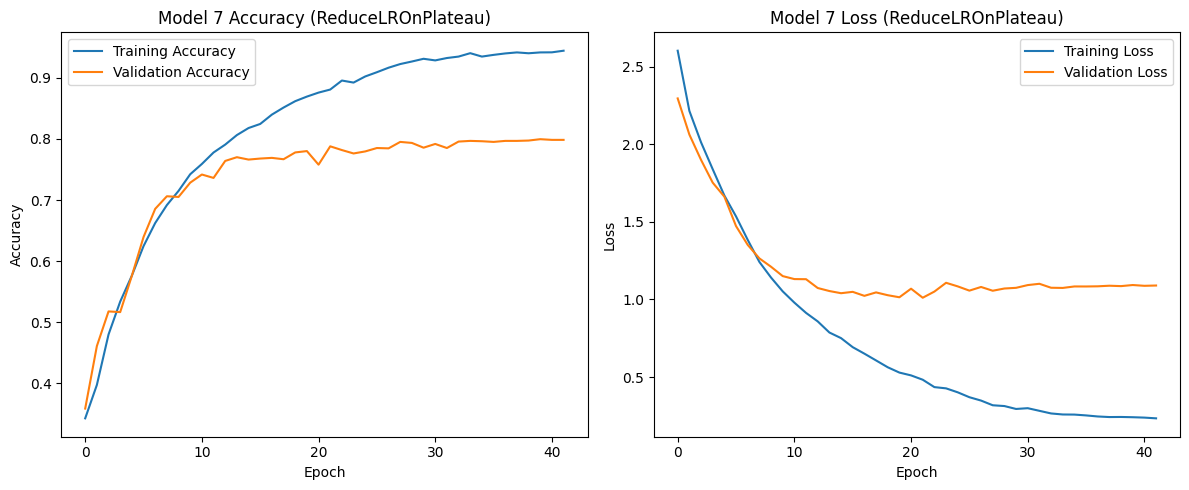

--------------------------------------------------
--- Final Performance Report (Model 7) ---
Test Loss: 1.0252
Test Accuracy: 77.070%


In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

if 'model_3' in locals():
    model_7 = tf.keras.models.clone_model(model_3)
    print("Model 7 created by cloning the structure of Model 3 (GlobalAveragePooling1D).")
elif 'model_1' in locals():
    model_7 = tf.keras.models.clone_model(model_1)
    print("Model 7 created by cloning the structure of Model 1 (Flatten).")
else:
    print("ERROR: No preceding model structure found (model_1 or model_3).")
    raise ValueError("Cannot clone model structure.")

STARTING_LR = 0.001
optimizer = Adam(learning_rate=STARTING_LR)

model_7.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(f"Model 7 compiled successfully with starting LR: {STARTING_LR}")
print("-" * 50)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
print("Defined EarlyStopping and ReduceLROnPlateau callbacks.")

EPOCHS_MAX = 100
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

print(f"Starting training with automatic Learning Rate reduction...")
start_time = time.time()

if 'train_data_padded' not in locals() or 'train_labels_one_hot' not in locals():
    print("\nERROR: Data variables are missing. Please run data preparation cells.")
    raise ValueError("Data setup incomplete.")


history_7 = model_7.fit(
    train_data_padded,
    train_labels_one_hot,
    epochs=EPOCHS_MAX,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping_callback, reduce_lr_callback],
    verbose=1
)

end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total training time: {end_time - start_time:.2f} seconds.")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_7.history['accuracy'], label='Training Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 7 Accuracy (ReduceLROnPlateau)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_7.history['loss'], label='Training Loss')
plt.plot(history_7.history['val_loss'], label='Validation Loss')
plt.title('Model 7 Loss (ReduceLROnPlateau)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("-" * 50)

print("--- Final Performance Report (Model 7) ---")
loss_7, accuracy_7 = model_7.evaluate(
    test_data_padded,
    test_labels_one_hot,
    verbose=0
)

print(f"Test Loss: {loss_7:.4f}")
print(f"Test Accuracy: {accuracy_7 * 100:.3f}%")

### Learning Rate Scheduler

Create `model_8` by appplying a Step Decay Learning Rate Scheduler, to reduce the learning rate by half every 5 epochs.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required.

Model 8 created by cloning the structure of Model 3 (GlobalAveragePooling1D).
Model 8 compiled successfully with starting LR: 0.001
--------------------------------------------------
Defined Step Decay Scheduler: LR reduced by 0.5 every 5 epochs.
Starting training with Step Decay Learning Rate Scheduler...
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3156 - loss: 2.9505 - val_accuracy: 0.3545 - val_loss: 2.3114 - learning_rate: 0.0010
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3719 - loss: 2.2971 - val_accuracy: 0.3934 - val_loss: 2.1301 - learning_rate: 0.0010
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4400 - loss: 2.0984 - val_accuracy: 0.5097 - val_loss: 1.9074 - learning_rate: 0.0010
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5288 - loss: 1.8324 - val_accuracy: 0.5637 - val_loss: 1.7177 - learning_rate: 0.0010
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5700 - loss: 1.6991 - 

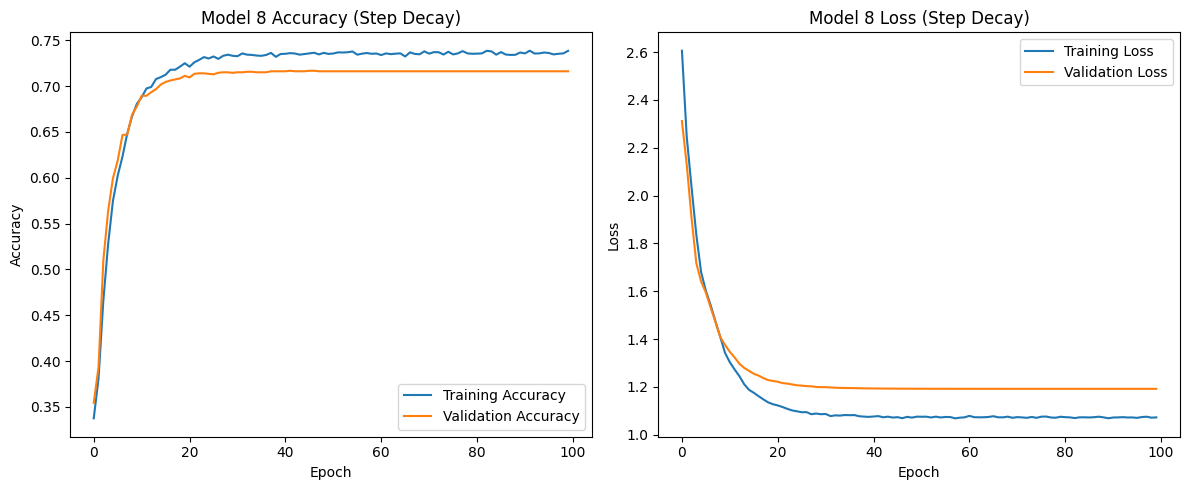

--------------------------------------------------
--- Final Performance Report (Model 8) ---
Test Loss: 1.2512
Test Accuracy: 69.679%


In [30]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import math

def step_decay_schedule(initial_lrate, drop_factor, epochs_drop):
    """
    Learning Rate Scheduler function for Keras/TensorFlow.
    Reduces the learning rate by 'drop_factor' every 'epochs_drop'.
    """
    def step_decay(epoch):
        drops = math.floor((1 + epoch) / epochs_drop)
        lrate = initial_lrate * math.pow(drop_factor, drops)
        return lrate
    return step_decay

if 'model_3' in locals():
    model_8 = tf.keras.models.clone_model(model_3)
    print("Model 8 created by cloning the structure of Model 3 (GlobalAveragePooling1D).")
elif 'model_1' in locals():
    model_8 = tf.keras.models.clone_model(model_1)
    print("Model 8 created by cloning the structure of Model 1 (Flatten).")
else:
    print("ERROR: No preceding model structure found (model_1 or model_3).")
    raise ValueError("Cannot clone model structure.")

STARTING_LR = 0.001
optimizer = Adam(learning_rate=STARTING_LR)

model_8.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(f"Model 8 compiled successfully with starting LR: {STARTING_LR}")
print("-" * 50)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

DROP_FACTOR = 0.5
EPOCHS_DROP = 5

lr_scheduler_callback = LearningRateScheduler(
    step_decay_schedule(STARTING_LR, DROP_FACTOR, EPOCHS_DROP)
)
print(f"Defined Step Decay Scheduler: LR reduced by {DROP_FACTOR} every {EPOCHS_DROP} epochs.")

EPOCHS_MAX = 100
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

print(f"Starting training with Step Decay Learning Rate Scheduler...")
start_time = time.time()

if 'train_data_padded' not in locals() or 'train_labels_one_hot' not in locals():
    print("\nERROR: Data variables are missing. Please run data preparation cells.")
    raise ValueError("Data setup incomplete.")


history_8 = model_8.fit(
    train_data_padded,
    train_labels_one_hot,
    epochs=EPOCHS_MAX,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    # Pass both callbacks to the fit function
    callbacks=[early_stopping_callback, lr_scheduler_callback],
    verbose=1
)

end_time = time.time()
print(f"\n--- Training Finished ---")
print(f"Total training time: {end_time - start_time:.2f} seconds.")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_8.history['accuracy'], label='Training Accuracy')
plt.plot(history_8.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 8 Accuracy (Step Decay)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_8.history['loss'], label='Training Loss')
plt.plot(history_8.history['val_loss'], label='Validation Loss')
plt.title('Model 8 Loss (Step Decay)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("-" * 50)

print("--- Final Performance Report (Model 8) ---")
loss_8, accuracy_8 = model_8.evaluate(
    test_data_padded,
    test_labels_one_hot,
    verbose=0
)

print(f"Test Loss: {loss_8:.4f}")
print(f"Test Accuracy: {accuracy_8 * 100:.3f}%")

## Part 4. Create and Train a Model with Recurrent Layers (1 point)

Next, create `model_9` using LSTM layers similar to the model in Lecture 18. Train the model for 5 epochs without using callbacks, and report the performance. Expect longer training time with RNN models.

In [31]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Bidirectional, LSTM, TextVectorization
from tensorflow.keras.models import Model

vocab_size = 20000
embedding_dim = 64
lstm_units = 64
num_classes = 4
EPOCHS = 5
BATCH_SIZE = 32

print("Loading AG News Dataset...")
(train_data, val_data), info = tfds.load(
    'ag_news_subset:1.0.0',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True
)

def load_data(dataset):
    inputs, labels = [], []
    for input_text, label in tfds.as_numpy(dataset):
        inputs.append(input_text)
        labels.append(label)
    return tf.convert_to_tensor(inputs, dtype=tf.string), tf.convert_to_tensor(labels)

train_inputs, train_labels = load_data(train_data)
val_inputs, val_labels = load_data(val_data)

print(f"Training samples: {len(train_inputs)}, Validation samples: {len(val_inputs)}")

text_vect_layer = TextVectorization(max_tokens=vocab_size)
print("Adapting TextVectorization layer to training data...")
text_vect_layer.adapt(train_inputs)

print("Defining model_9 (Bidirectional LSTM)...")

inputs = Input(shape=(1,), dtype=tf.string, name='input_text')

x = text_vect_layer(inputs)

x = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    name='embedding_layer'
)(x)

x = Bidirectional(
    LSTM(lstm_units),
    name='bidirectional_lstm'
)(x)

x = Dense(64, activation='relu', name='dense_64')(x)

outputs = Dense(num_classes, activation='softmax', name='output_softmax')(x)

model_9 = Model(inputs=inputs, outputs=outputs)

model_9.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Summary (model_9) ---")
model_9.summary()

print(f"\n--- Starting Training for {EPOCHS} Epochs (Expect a longer runtime) ---")

history_9 = model_9.fit(
    train_inputs,
    train_labels,
    validation_data=(val_inputs, val_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

print("\n--- Training History (model_9) ---")
for i in range(EPOCHS):
    print(f"Epoch {i+1}/{EPOCHS} - "
          f"Train Loss: {history_9.history['loss'][i]:.4f}, "
          f"Train Acc: {history_9.history['accuracy'][i]:.4f}, "
          f"Val Loss: {history_9.history['val_loss'][i]:.4f}, "
          f"Val Acc: {history_9.history['val_accuracy'][i]:.4f}")

val_loss, val_accuracy = model_9.evaluate(val_inputs, val_labels, verbose=0)
print("\n--- Final Performance ---")
print(f"Final Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")

Loading AG News Dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.24NO7S_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.24NO7S_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.
Training samples: 120000, Validation samples: 7600
Adapting TextVectorization layer to training data...
Defining model_9 (Bidirectional LSTM)...

--- Model Summary (model_9) ---


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)         │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, None)           │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, None, 64)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ (None, 128)            │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,354,564 (5.17 MB)

 Trainable params: 1,354,564 (5.17 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training for 5 Epochs (Expect a longer runtime) ---
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.8130 - loss: 0.4761 - val_accuracy: 0.9054 - val_loss: 0.2700
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.9315 - loss: 0.1997 - val_accuracy: 0.9112 - val_loss: 0.2602
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9519 - loss: 0.1403 - val_accuracy: 0.9117 - val_loss: 0.2661
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9647 - loss: 0.1008 - val_accuracy: 0.9063 - val_loss: 0.3200
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9756 - loss: 0.0695 - val_accuracy: 0.9026 - val_loss: 0.3558

--- Training History (model_9) ---
Epoch 1/5 - Train Loss: 0.3391, Train Acc: 0.8794, Val Loss: 0.2700, Val Acc: 0.9054
Epoch 2/5 - Train Loss: 0.2029, Train Acc: 0.9298, Val Loss: 0.2602, Val Acc: 0.9112
Epoch 3/5 - Train Loss: 0.1501, Train Acc: 0.9477, Val Loss: 0.2661, Val Acc: 